## US Hit Streaming Songs Project - Data Analysis

The following Jupyter Notebook analyzes the data collected in the previous section of this project. 

To start, we import necessary tools and the data collected previously. 

In [1]:
#for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to remove the limits on a dataframe's columns displayed
pd.set_option('display.max_columns', None)

#to access google sheets with python
import gspread
from google.oauth2 import service_account
from oauth2client.service_account import ServiceAccountCredentials

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#for plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.express as px
import cufflinks as cf

# For Notebooks (plotly)
init_notebook_mode(connected=True)

# For offline use (plotly)
cf.go_offline()

In [2]:
#service account
sa = gspread.service_account(filename="gspread_service_account.json")

#sheet
sh = sa.open("HITS Streaming Songs")

#worksheet
wks = sh.worksheet("DF to Gspread")

#uses all values in the worksheet for the data frame
gsheets_df_updated = pd.DataFrame(wks.get_all_values())

header = gsheets_df_updated.iloc[0] #isolate first row as header
gsheets_df_updated = gsheets_df_updated[1:] #get rid of header in original df
gsheets_df_updated.columns = header

#set 'index' as index
gsheets_df_updated = gsheets_df_updated.set_index('index')

#convert index from string to int
gsheets_df_updated.index = gsheets_df_updated.index.astype(int)

#fill in blank values with 0 
gsheets_df_updated = gsheets_df_updated.replace(r'^\s*$', "0", regex=True)
    
#turn peak_date strings to date format
gsheets_df_updated['peak_date'] = pd.to_datetime(gsheets_df_updated['peak_date'])
gsheets_df_updated['release_date'] = pd.to_datetime(gsheets_df_updated['release_date'])

#change the following columns to int/float/boolean format
gsheets_df_updated.loc[:,'streams_2017_to_present':'holiday_music'] = gsheets_df_updated.loc[:,'streams_2017_to_present':'holiday_music'].astype(int)
gsheets_df_updated.loc[:,'length':'valence'] = gsheets_df_updated.loc[:,'length':'valence'].astype(float)
gsheets_df_updated['explicit'] = gsheets_df_updated['explicit'].apply(eval)

#drop christmas songs
gsheets_df_updated.drop(gsheets_df_updated[gsheets_df_updated['holiday_music']==1].index,inplace=True)
gsheets_df_updated.reset_index(drop=True, inplace=True)

gsheets_df_updated

,title,artist,album,peak_date,streams_2017_to_present,total_streams_2020s,peak_week_streams,current_year,2022-06-17,2022-06-10,2022-06-03,2022-05-27,2022-05-20,2022-05-13,2022-05-06,2022-04-29,2022-04-22,2022-04-15,2022-04-08,2022-04-01,2022-03-25,2022-03-18,2022-03-11,2022-03-04,2022-02-25,2022-02-18,2022-02-11,2022-02-04,2022-01-28,2022-01-21,2022-01-14,2022-01-07,2021-12-31,2021-12-24,2021-12-17,2021-12-10,2021-12-03,2021-11-26,2021-11-19,2021-11-12,2021-11-05,2021-10-29,2021-10-22,2021-10-15,2021-10-08,2021-10-01,2021-09-24,2021-09-17,2021-09-10,2021-09-03,2021-08-27,2021-08-20,2021-08-13,2021-08-06,2021-07-30,2021-07-23,2021-07-16,2021-07-09,2021-07-02,2021-06-25,2021-06-18,2021-06-11,2021-06-04,2021-05-28,2021-05-21,2021-05-14,2021-05-07,2021-04-30,2021-04-23,2021-04-16,2021-04-09,2021-04-02,2021-03-26,2021-03-19,2021-03-12,2021-03-05,2021-02-26,2021-02-19,2021-02-12,2021-02-05,2021-01-29,2021-01-22,2021-01-15,2021-01-08,2021-01-01,2020-12-25,2020-12-18,2020-12-11,2020-12-04,2020-11-27,2020-11-20,2020-11-13,2020-11-06,2020-10-30,2020-10-23,2020-10-16,2020-10-09,2020-10-02,2020-09-25,2020-09-18,2020-09-11,2020-09-04,2020-08-28,2020-08-21,2020-08-14,2020-08-07,2020-07-31,2020-07-24,2020-07-17,2020-07-10,2020-07-03,2020-06-26,2020-06-19,2020-06-12,2020-06-05,2020-05-29,2020-05-22,2020-05-15,2020-05-08,2020-05-01,2020-04-24,2020-04-17,2020-04-10,2020-04-03,2020-03-27,2020-03-20,2020-03-13,2020-03-06,2020-02-28,2020-02-21,2020-02-14,2020-02-07,2020-01-31,2020-01-24,2020-01-17,2020-01-10,2020-01-03,2019-12-27,2019-12-20,2019-12-13,2019-12-06,2019-11-29,2019-11-22,2019-11-15,2019-11-08,2019-11-01,2019-10-25,2019-10-18,2019-10-11,2019-10-04,2019-09-27,2019-09-20,2019-09-13,2019-09-06,2019-08-30,2019-08-23,2019-08-16,2019-08-09,2019-08-02,2019-07-26,2019-07-19,2019-07-12,2019-07-05,2019-06-28,2019-06-21,2019-06-14,2019-06-07,2019-05-31,2019-05-24,2019-05-17,2019-05-10,2019-05-03,2019-04-26,2019-04-19,2019-04-12,2019-04-05,2019-03-29,2019-03-22,2019-03-15,2019-03-08,2019-03-01,2019-02-22,2019-02-15,2019-02-08,2019-02-01,2019-01-25,2019-01-18,2019-01-11,2019-01-04,2018-12-28,2018-12-21,2018-12-14,2018-12-07,2018-11-30,2018-11-23,2018-11-16,2018-11-09,2018-11-02,2018-10-26,2018-10-19,2018-10-12,2018-10-05,2018-09-28,2018-09-21,2018-09-14,2018-09-07,2018-08-31,2018-08-24,2018-08-17,2018-08-10,2018-08-03,2018-07-27,2018-07-20,2018-07-13,2018-07-06,2018-06-29,2018-06-22,2018-06-15,2018-06-08,2018-06-01,2018-05-25,2018-05-18,2018-05-11,2018-05-04,2018-04-27,2018-04-20,2018-04-13,2018-04-06,2018-03-30,2018-03-23,2018-03-16,2018-03-09,2018-03-02,2018-02-23,2018-02-16,2018-02-09,2018-02-02,2018-01-26,2018-01-19,2018-01-12,2018-01-05,2017-12-29,2017-12-15,2017-12-08,2017-12-01,2017-11-24,2017-11-17,2017-11-10,2017-11-03,2017-10-27,2017-10-20,2017-10-13,2017-10-06,2017-09-29,2017-09-22,2017-09-15,2017-09-08,2017-09-01,2017-08-25,2017-08-18,2017-08-11,2017-08-04,2017-07-28,2017-07-21,2017-07-14,2017-07-07,2017-06-30,2017-06-23,2017-06-16,2017-06-09,2017-06-02,2017-05-26,2017-05-19,2017-05-12,2017-05-05,2017-04-28,2017-04-21,2017-04-14,2017-04-07,2017-03-31,total_2022,total_2021,total_2020,total_2019,total_2018,total_2017,units,holiday_music,uri,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit
0,Closer,The Chainsmokers,Closer,2016-09-09,5528407,0,5528407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5528407,5420007,0,0,0,0,0,10948414,36856,0,spotify:

## Data distrubution
Based on the following histographs taken from HITS and Spotify, the following can be concluded:
 
* A very small amount of songs reach high popularity levels (based on the distributions of streams_2017_to_present and total_streams_2020s)
* Many songs on the top 50 tend to peak with at a bit less than 10 million weekly streams
* The mean length of hit songs in the top 50 of streaming are at around 200,000 milliseconds (or around 3 minutes, 20 seconds)
* Most top 50 hit songs on streaming lack acousticness
* Most top 50 hit songs on streaming lean towards being more danceable than not
* Most top 50 hit songs on streaming lean towards being more energetic
* An extremely high amount of songs lack instrumentalness
* Most top 50 hit songs on streaming lean towards being less likely to be recorded with a live audience
* Hit songs lean to be more louder
* The split between songs written in a major key (mode=1) versus a minor key (mode=0) means more towards songs written in major key
* Many songs lack speechiness
* Distribution of tempos are all over the place
* The mean valence (musical positiveness conveyed by a track) for all songs leans more towards sounding more negative (sad, depressed, angry) than happy

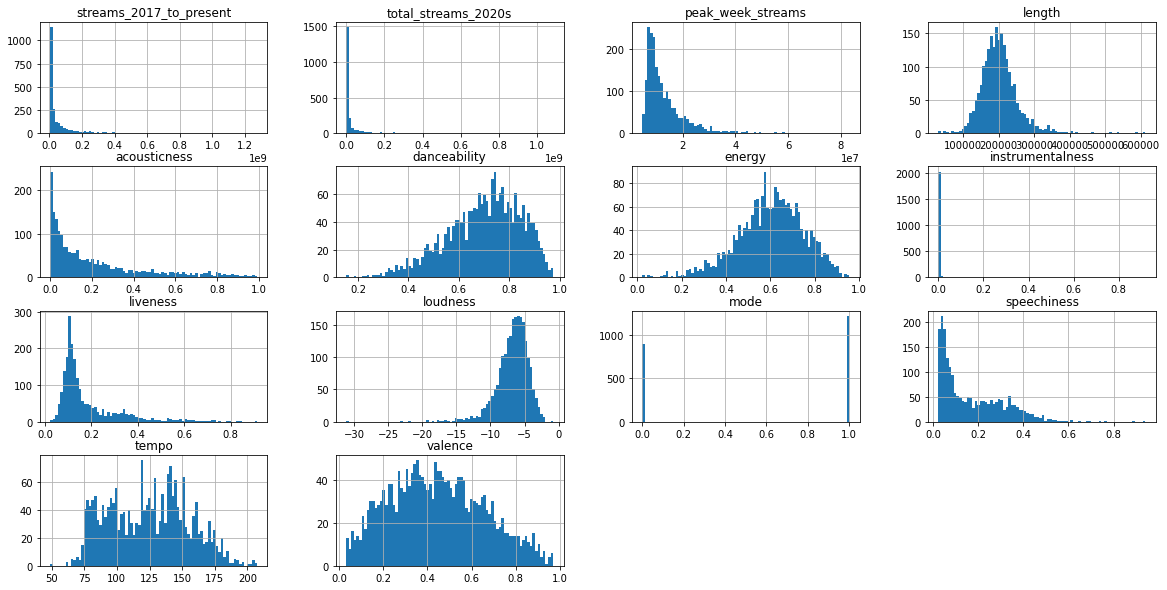

In [3]:
gsheets_df_updated[['streams_2017_to_present','total_streams_2020s'
          ,'peak_week_streams','length','acousticness'
         ,'danceability','energy','instrumentalness','liveness'
         ,'loudness','mode','speechiness','tempo'
          ,'valence']].hist(figsize=(20,10), bins=80)

plt.show()

## Correlation Graph

Based on the graph below, it seems like only energy and loudness have a strong (below negative 0.67 or above positive 0.67) correlation with each other.

Text(0.5, 1.0, 'Correlation Graph')

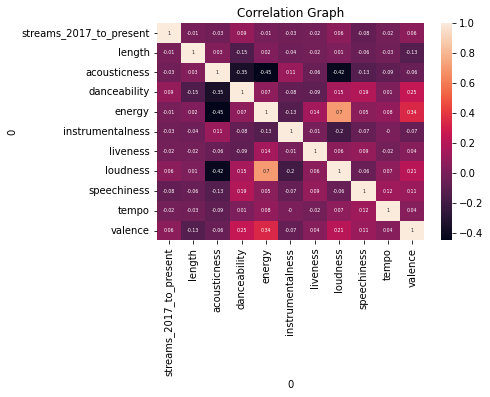

In [4]:
sns.heatmap(gsheets_df_updated.loc[:,['title','artist','album','streams_2017_to_present',
    'length','acousticness','danceability','energy','instrumentalness',
    'liveness','loudness','speechiness','tempo','valence']].corr().round(2),
           annot=True,
           annot_kws={'size': 4.8},
           xticklabels=True, 
           yticklabels=True)
plt.title('Correlation Graph')

## Analysis of Song Length

Prior scholarly research concludes that hit songs are shorter than they were in the past. The following analyzes whether there are any changes in the mean and median length of a song as a song has more streams. Based on the visual analysis below, more streams does not necessarily mean short song length. 

In [5]:
#function to convert song length from milliseconds to minutes : seconds : milliseconds format
def ms_to_time(ms):
    """
    Converts milliseconds to time in "minute:secconds:millisecond" format

    Parameters:
        milliseconds (str): the length of a song in milliseconds
    
    Returns
        song_length (str): the length of a song converted into min:sec:ms format 
    """
    millis = ms
    seconds=(millis/1000)%60
    seconds = int(seconds)
    minutes=(millis/(1000*60))%60
    minutes = int(minutes)
    
    #a string will be returned so add 0 before songs with length < 10 mins so that songs above 10 mins won't be misordered when ordering by min:sec:ms format
    if minutes < 10:
        return "0%d:%d:%d" % (minutes, seconds, millis)
    else:
        return "%d:%d:%d" % (minutes, seconds, millis)

The average length of a hit song on the Streaming Top 50 (excluding holiday music) is:  03:21:201647
The median length of a hit song on the Streaming Top 50 (excluding holiday music) is:  03:17:197620
2110 songs appeared on the HITS Streaming Chart since 2017


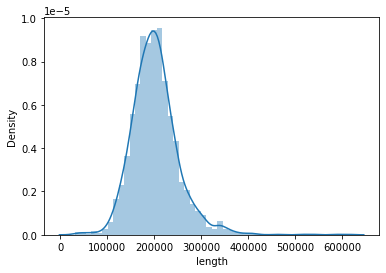

In [6]:
sns.distplot(gsheets_df_updated['length'])

print("The average length of a hit song on the Streaming Top 50 (excluding holiday music) is: ", ms_to_time( int(round(gsheets_df_updated['length'].mean())) ))
print("The median length of a hit song on the Streaming Top 50 (excluding holiday music) is: ", ms_to_time( int(round(gsheets_df_updated['length'].median())) ))
print(len(gsheets_df_updated), "songs appeared on the HITS Streaming Chart since 2017")


The average length of a hit song with at least 50 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:22:202430
The median length of a hit song with at least 50 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:19:199849
595 songs earned over 50 mil streams during their time in the top 50 of Streaming since 2017


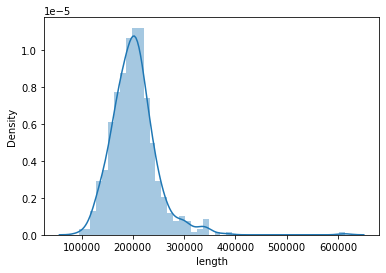

In [7]:
sns.distplot(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 50000000]['length'])

print("The average length of a hit song with at least 50 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 50000000]['length'].mean())) ))
print("The median length of a hit song with at least 50 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 50000000]['length'].median())) ))
print(len(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 50000000]), "songs earned over 50 mil streams during their time in the top 50 of Streaming since 2017")



The average length of a hit song with at least 100 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:21:201029
The median length of a hit song with at least 100 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:20:200204
358 songs earned over 100 mil streams during their time in the top 50 of Streaming since 2017


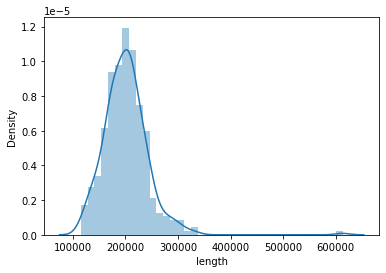

In [8]:
sns.distplot(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 100000000]['length'])

print("The average length of a hit song with at least 100 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 100000000]['length'].mean())) ))
print("The median length of a hit song with at least 100 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 100000000]['length'].median())) ))
print(len(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 100000000]), "songs earned over 100 mil streams during their time in the top 50 of Streaming since 2017")


The average length of a hit song with at least 200 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:17:197361
The median length of a hit song with at least 200 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:15:195024
188 songs earned over 200 mil streams during their time in the top 50 of Streaming since 2017


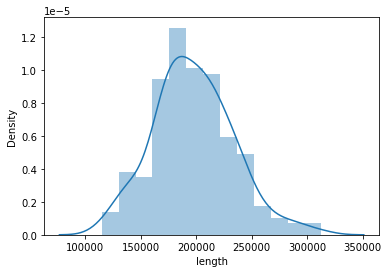

In [9]:
sns.distplot(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 200000000]['length'])

print("The average length of a hit song with at least 200 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 200000000]['length'].mean())) ))
print("The median length of a hit song with at least 200 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 200000000]['length'].median())) ))
print(len(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 200000000]), "songs earned over 200 mil streams during their time in the top 50 of Streaming since 2017")


The average length of a hit song with at least 300 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:20:200474
The median length of a hit song with at least 300 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:20:200294
106 songs earned over 300 mil streams during their time in the top 50 of Streaming since 2017


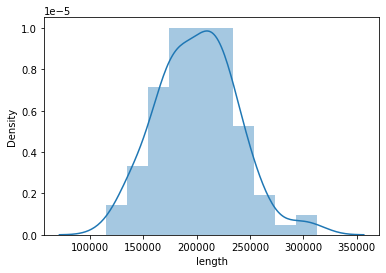

In [10]:
sns.distplot(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 300000000]['length'])

print("The average length of a hit song with at least 300 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 300000000]['length'].mean())) ))
print("The median length of a hit song with at least 300 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 300000000]['length'].median())) ))
print(len(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 300000000]), "songs earned over 300 mil streams during their time in the top 50 of Streaming since 2017")



The average length of a hit song with at least 400 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:16:196578
The median length of a hit song with at least 400 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:16:196652
57 songs earned over 400 mil streams during their time in the top 50 of Streaming since 2017


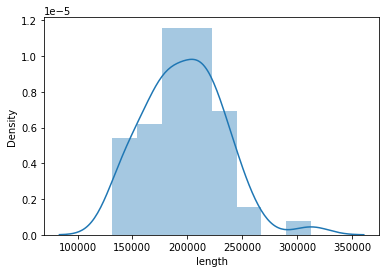

In [11]:
sns.distplot(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 400000000]['length'])

print("The average length of a hit song with at least 400 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 400000000]['length'].mean())) ))
print("The median length of a hit song with at least 400 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 400000000]['length'].median())) ))
print(len(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 400000000]), "songs earned over 400 mil streams during their time in the top 50 of Streaming since 2017")


The average length of a hit song with at least 500 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:19:199151
The median length of a hit song with at least 500 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:20:200040
37 songs earned over 500 mil streams during their time in the top 50 of Streaming since 2017


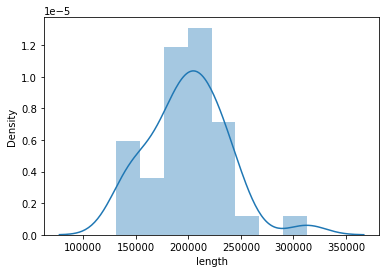

In [12]:
sns.distplot(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 500000000]['length'])

print("The average length of a hit song with at least 500 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 500000000]['length'].mean())) ))
print("The median length of a hit song with at least 500 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 500000000]['length'].median())) ))
print(len(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 500000000]), "songs earned over 500 mil streams during their time in the top 50 of Streaming since 2017")



The average length of a hit song with at least 600 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:24:204580
The median length of a hit song with at least 600 mil streams during their time on the Streaming Top 50 (excluding holiday music) is:  03:20:200040
17 songs earned over 600 mil streams during their time in the top 50 of Streaming since 2017


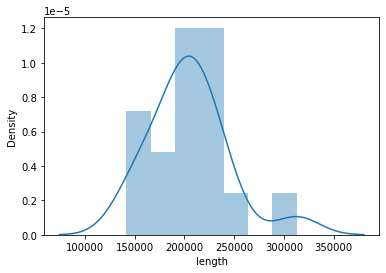

In [13]:
sns.distplot(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 600000000]['length'])

print("The average length of a hit song with at least 600 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 600000000]['length'].mean())) ))
print("The median length of a hit song with at least 600 mil streams during their time on the Streaming Top 50 (excluding holiday music) is: ", 
      ms_to_time( int(round(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 600000000]['length'].median())) ))
print(len(gsheets_df_updated[gsheets_df_updated['streams_2017_to_present'] > 600000000]), "songs earned over 600 mil streams during their time in the top 50 of Streaming since 2017")



## Creating a Dashboard of week-to-week changes in song characteristics

In [14]:
#create a list of dates
list_of_dates = gsheets_df_updated.columns.to_list()[8:-26]

#melt the data (converting the dataframe's info on song streams from horizontal to vertical form)
df_melted = gsheets_df_updated.melt(id_vars=['title','artist','album','peak_date'],
        value_vars=list_of_dates, var_name='observed_date', value_name='streams')
df_melted.drop(df_melted[df_melted['streams']==0].index, inplace=True) #drop all weekly observations with 0 streams
df_melted.reset_index(drop=True, inplace=True)

#convert the observed_date to a datetime format
df_melted['observed_date'] = pd.to_datetime(df_melted['observed_date'])

#drop data from the weeks starting on 2019-12-13 and 2019-12-20
#as there's very few data on those weeks (the few songs were individually-calculated using Rolling Stones charts as reference)
df_melted.drop(df_melted[ (df_melted['observed_date']=='2019-12-13') | (df_melted['observed_date']=='2019-12-20') ].index, inplace=True)

#create variables for each song observation's year, month and week 
df_melted['obs_year'] = df_melted['observed_date'].apply(lambda x: x.year)
df_melted['obs_month'] = df_melted['observed_date'].apply(lambda x: x.month)
df_melted['obs_week'] = df_melted['observed_date'].apply(lambda x: x.isocalendar()[1])

#get variables to merge w/ df_melted (since every value after the weekly streams were eliminated in the melting process)
to_merge = ['title','artist','album','length','acousticness','danceability','energy',
 'instrumentalness','key','liveness','loudness','mode','speechiness','tempo',
 'time_signature','valence','explicit']

#merge
df_melted = pd.merge(df_melted, gsheets_df_updated.loc[:,to_merge], how='left', on=['title','artist','album'])

#add normalized tempos (scale them to graph with other variables)
df_melted['tempo_normalized'] = df_melted['tempo'] / df_melted['tempo'].max()

#add normalized lengths (scale them to graph with other variables)
df_melted['length_normalized'] = df_melted['length'] / df_melted['length'].max()

df_melted

,title,artist,album,peak_date,observed_date,streams,obs_year,obs_month,obs_week,length,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit,tempo_normalized,length_normalized
0,Whiskey Glasses,Morgan Wallen,If I Know Me,2019-06-07,2022-06-17,6431677,2022,6,24,234346.0,0.36900,0.614,0.680,0.000002,6.0,0.1150,-4.580,1.0,0.0289,149.959,4.0,0.707,False,0.722778,0.382277
1,Wasted On You,Morgan Wallen,Dangerous: The Double Album,2021-01-08,2022-06-17,7106537,2022,6,24,178520.0,0.37300,0.505,0.657,0.001070,11.0,0.1260,-5.240,0.0,0.0318,196.000,3.0,0.252,False,0.944688,0.291211
2,Heat Waves,Glass Animals,Dreamland (+ Bonus Levels),2021-09-10,2022-06-17,9672472,2022,6,24,238805.0,0.44000,0.761,0.525,0.000007,11.0,0.0921,-6.900,1.0,0.0944,80.870,4.0,0.531,False,0.389780,0.389551
3,STAY (with Justin Bieber),The Kid LAROI,F*CK LOVE 3+: OVER YOU,2021-07-09,2022-06-17,6181978,2022,6,24,141805.0,0.03830,0.591,0.764,0.000000,1.0,0.1030,-5.484,1.0,0.0483,169.928,4.0,0.478,True,0.819025,0.231320
4,Super Gremlin,Kodak Black,Back For Everything,2022-01-21,2022-06-17,6416417,2022,6,24,200547.0,0.00265,0.825,0.414,0.000000,2.0,0.3570,-6.634,1.0,0.1440,72.993,4.0,0.106,True,0.351814,0.327143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12784,Now Or Never,Halsey,hopeless fountain kingdom (Deluxe),2017-06-02,2017-04-07,6198250,2017,4,14,214801.0,0.10700,0.670,0.585,0.000001,6.0,0.1310,-4.861,0.0,0.0354,110.030,4.0,0.447,False,0.530326,0.350395
12785,Sign of the Times,Harry Styles,Harry Styles,2017-04-07,2017-04-07,10397512,2017,4,14,340706.0,0.02750,0.516,0.595,0.000000,5.0,0.1090,-4.630,1.0,0.0313,119.972,4.0,0.222,False,0.578245,0.555777
12786,Redbone,Childish Gambino,"""Awaken, My Love!""",2017-06-09,2017-04-07,5018943,2017,4,14,326933.0,0.16900,0.743,0.344,0.008790,1.0,0.1030,-11.174,1.0,0.1180,160.150,4.0,0.577,True,0.771897,0.533310
12787,Say You Won't Let Go,James Arthur,Back from the Edge,2017-05-12,2017-04-07,5259039,2017,4,14,211466.0,0.69500,0.358,0.557,0.000000,10.0,0.0902,-7.398,1.0,0.0590,85.043,4.0,0.494,False,0.409893,0.344954


In [15]:
#group data by week with mean data
df_grpd_meltd_mean = df_melted.groupby(['observed_date']).mean().reset_index()

#plot the following variables
to_plot = ['observed_date','danceability','energy','acousticness','instrumentalness',
          'speechiness','tempo_normalized','length_normalized']

fig = px.line(df_grpd_meltd_mean.loc[:,to_plot].set_index('observed_date'))
fig.show()



The following graph above provides interesting insights on the state of popular music in the United States throughout the on-demand audio streaming era (2017-present). Conclusions from the visual above are the following:

* Danceability stayed mostly consistent from March 2017 to early 2021. From there, danceability for hit songs decreased to be below 0.7 (measured on a scale from 0.0-1.0). However, a small increase can be seen since late April 2022. Whether that minor increase holds depends on the upcoming weeks and months (and years) of popular music. 


* Energy remained mostly consistent thorughout the years, with some ups and downs on certain weeks. Some notable decreases include the week starting on June 29, 2018 (Drake's release of his 2018 record-breaking album, Scorpion, which FLOODED the charts at the time) and the week starting on March 29, 2019 (Billie Eilish's release of her 2019 album, WHEN WE ALL FALL ASLEEP, WHERE DO WE GO) among others who are known to make albums with less energetic music. 


* Tempo mostly remains the same throughout the years. Not soo much variation there. It would be interesting to include data on hit music going back to 2009/2010 which marks the start of the high-tempo club pop music popular in the early 2010s. It is expected for tempo to drop as the years go by since 2009/2010. 


* The average length of hit songs in the late 2010s continues to decrease (a pattern noticed by many other researchers). However, unlike the conclusions made in most prior research which does not include data on the 2020s, it is clear that there is a slow increase in the average length of hit songs since late 2019. Some weeks in the 2020s that have relative peaks in average song lengths include the release of Drake's 2021 mega-album Certified Lover Boy (September 3, 2021), Taylor Swift's Nov 12, 2021 re-release of Red (especially with THAT song aka her 10 minute version of All Too Well), and Adele's Nov 19, 2021 release of 30. Critics and fans both noted the longer-than-average songs on both Drake's and Adele's 2021 album releases. Furthmore, it also seems like industry veterans (Drake, Adele, Taylor Swift, and to an extent Kanye West and Kendrick Lamar) can afford to release albums with longer-than-normal songs and still find massive amounts of success. 


* Acoustiness levels for hit songs hit a low point in 2018 (a year where rap/trap music firmly dominated the charts). However, there seems to be a steady increase since it's low point in early 2018. Once again, some albums dramatically changed the acousticness levels of hit music the week they were released. Notable examples include Billie Eilish's WHEN WE ALL FALL ASLEEP WHERE DO WE GO (March 29, 2019), Taylor Swift's Folklore (July 24, 2020), Taylor Swift's Evermore (December 11, 2021) **it should not be surprising given that Taylor Swift made two of the most popular folk-inspired albums of the 21st century so far**, and Kendrick Lamar's highly anticipated Mr. Morale and The Big Steppers (May 13, 2022) which included highly theatrical rap performances. 


* Speechiness levels mostly remained consistantly above 0.15 from spring 2018 to spring 2020 (to no coincidence, an era where rap music heavily dominated the charts). Since the COVID-19 lockdowns of March 2020 started, there are noticeably more weeks where speechiness levels remain below 0.15. This also coincides with the increasing popularity of non-rap pop music on the streaming charts of the USA.


* Instrumentalness mostly remains low with some weeks of increase (as usual, coinciding with the releases of certain albums such as XXXTentacion's 2018 album, SKINS; Metro Boomin & 21 Savage's 2020 album, SAVAGE MODE 2; and most recently, Drake's 2022 dance album, Honestly Nevermind). For the most part, highly instrumental tracks just aren't popular with the general public on streaming.
